<a href="https://colab.research.google.com/github/PrasoonAZ/ML_Assignment02_PrasoonJha_24565025_TipRegressionproblem/blob/main/Assignment02_PrasoonJha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "tips (data for regression problem).csv"

df = pd.read_csv(file_path)

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df_dummies = pd.get_dummies(df[['sex', 'smoker', 'day', 'time']], drop_first=True)
df_dummies = pd.concat([df, df_dummies], axis=1)
df_dummies.drop(['sex', 'smoker', 'day', 'time'], axis=1, inplace=True)

In [9]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
df_dummies

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [12]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   size        244 non-null    int64  
 3   sex_Male    244 non-null    bool   
 4   smoker_Yes  244 non-null    bool   
 5   day_Sat     244 non-null    bool   
 6   day_Sun     244 non-null    bool   
 7   day_Thur    244 non-null    bool   
 8   time_Lunch  244 non-null    bool   
dtypes: bool(6), float64(2), int64(1)
memory usage: 7.3 KB


In [13]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [14]:
df_dummies.columns

Index(['total_bill', 'tip', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat',
       'day_Sun', 'day_Thur', 'time_Lunch'],
      dtype='object')

In [15]:
X = df_dummies.drop(columns='tip').values
y = df_dummies['tip'].values


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
X1 = df_dummies.drop(columns='tip')
y1 = df_dummies['tip']

In [18]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [19]:
X_train1.shape

(195, 8)

In [20]:
X_test1.shape

(49, 8)

In [21]:
X_test.shape

(49, 8)

In [22]:
y_test.shape

(49,)

Ridge Regression

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_ridge = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {ridge_mse}")

r2_score_ridge = r2_score(y_test, y_pred_ridge)
print('Ridge Regression R2:', r2_score_ridge)

Ridge Regression MSE: 0.7007477213216077
Ridge Regression R2: 0.4393889716178484


Lasso

In [24]:
from sklearn.linear_model import Lasso

# Fit Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_lasso = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {lasso_mse}")
# print("Selected Features in Lasso Model:", X.columns[(lasso_model.coef_ != 0)])

r2_score_lasso = r2_score(y_test, y_pred_lasso)
print('Lasso Regression R2:', r2_score_lasso)

Lasso Regression MSE: 0.6791265936812352
Lasso Regression R2: 0.45668627024964514


Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Fit Decision Tree
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_tree = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regression MSE: {tree_mse}")

r2_score_tree = r2_score(y_test, y_pred_tree)
print('Decision Tree R2:', r2_score_tree)

Decision Tree Regression MSE: 1.0017742771565827
Decision Tree R2: 0.1985622062896586


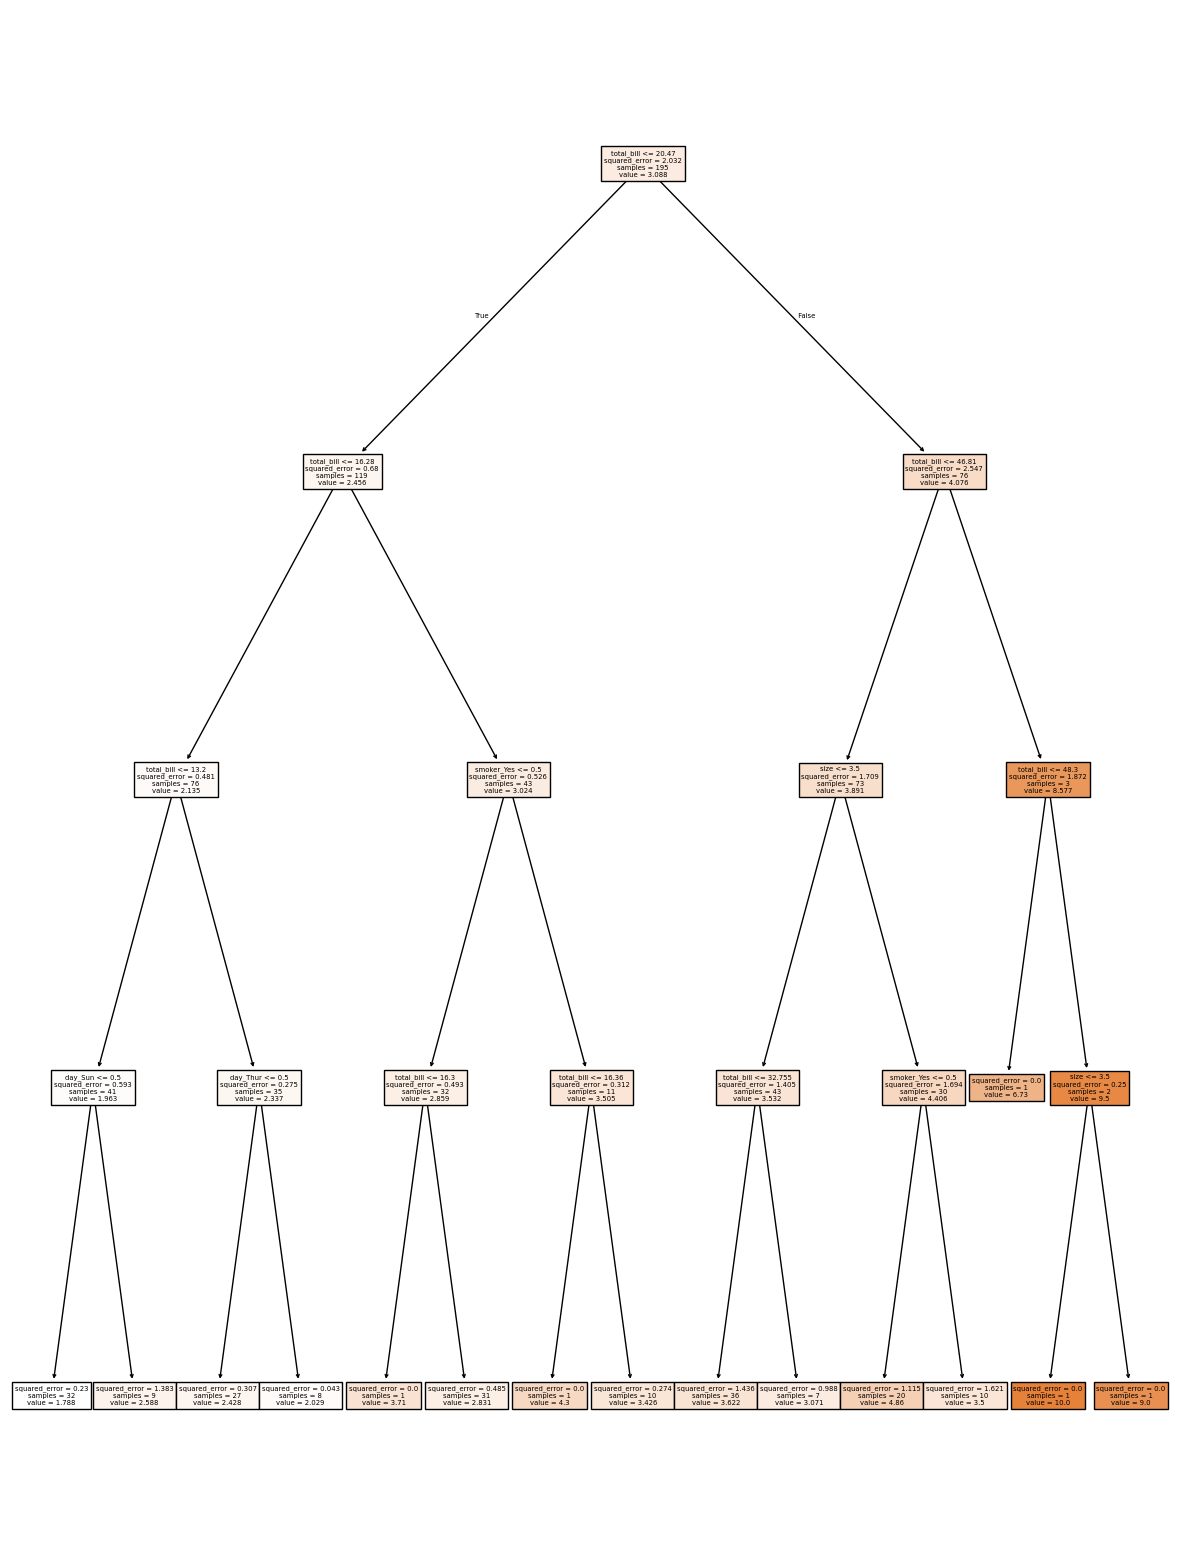

In [27]:
from sklearn.tree import plot_tree

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 20

plot_tree(tree_model, filled=True, feature_names=X_train1.columns)
plt.show()

Random Forest Regression

In [28]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regression MSE: {rf_mse}")

r2_score_rf = r2_score(y_test, y_pred_rf)
print('Random Forest R2:', r2_score_rf)

feature_importances = pd.DataFrame({
    'Feature': X_train1.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)


Random Forest Regression MSE: 0.9196720148979602
Random Forest R2: 0.2642455218065466
Feature Importances:
      Feature  Importance
0  total_bill    0.767043
3  smoker_Yes    0.069417
1        size    0.058045
4     day_Sat    0.030292
5     day_Sun    0.025223
2    sex_Male    0.025187
7  time_Lunch    0.012975
6    day_Thur    0.011818


Support Vector Regression

In [29]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Fit SVR
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Predictions and Evaluation
y_pred_svr = svr_model.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()
svr_mse = mean_squared_error(y_test, y_pred_svr)
print(f"SVR MSE: {svr_mse}")

r2_score_svr = r2_score(y_test, y_pred_svr)
print('SVR R2:', r2_score_svr)



SVR MSE: 1.1120997069534113
SVR R2: 0.11029983914495389


KNN

In [30]:
from sklearn.neighbors import KNeighborsRegressor

# Fit KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_knn = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Regression MSE: {knn_mse}")

r2_score_knn = r2_score(y_test, y_pred_knn)
print('KNN Regression R2:', r2_score_knn)


KNN Regression MSE: 0.8763725714285714
KNN Regression R2: 0.29888587066985495


Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {linear_mse}")

# Evaluation
r2_score_linear = r2_score(y_test, y_pred_linear)
print('Linear Regression R2:', r2_score(y_test, y_pred_linear) )

Linear Regression MSE: 0.7033566017436103
Linear Regression R2: 0.43730181943482516


In [32]:
mse_scores = {
    "Linear Regression": linear_mse,
    "Ridge Regression": ridge_mse,
    "Lasso Regression": lasso_mse,
    "Decision Tree": tree_mse,
    "Random Forest": rf_mse,
    "SVR": svr_mse,
    "KNN": knn_mse
}
print("Model MSE Comparison:", mse_scores)


Model MSE Comparison: {'Linear Regression': 0.7033566017436103, 'Ridge Regression': 0.7007477213216077, 'Lasso Regression': 0.6791265936812352, 'Decision Tree': 1.0017742771565827, 'Random Forest': 0.9196720148979602, 'SVR': 1.1120997069534113, 'KNN': 0.8763725714285714}


In [33]:
r2_score_mse = {
    "Linear Regression": r2_score_linear,
    "Ridge Regression": r2_score_ridge,
    "Lasso Regression": r2_score_lasso,
    "Decision Tree": r2_score_tree,
    "Random Forest": r2_score_rf,
    "SVR": r2_score_svr,
    "KNN": r2_score_knn
}
print("Model R2 Comparison:", r2_score_mse)

Model R2 Comparison: {'Linear Regression': 0.43730181943482516, 'Ridge Regression': 0.4393889716178484, 'Lasso Regression': 0.45668627024964514, 'Decision Tree': 0.1985622062896586, 'Random Forest': 0.2642455218065466, 'SVR': 0.11029983914495389, 'KNN': 0.29888587066985495}


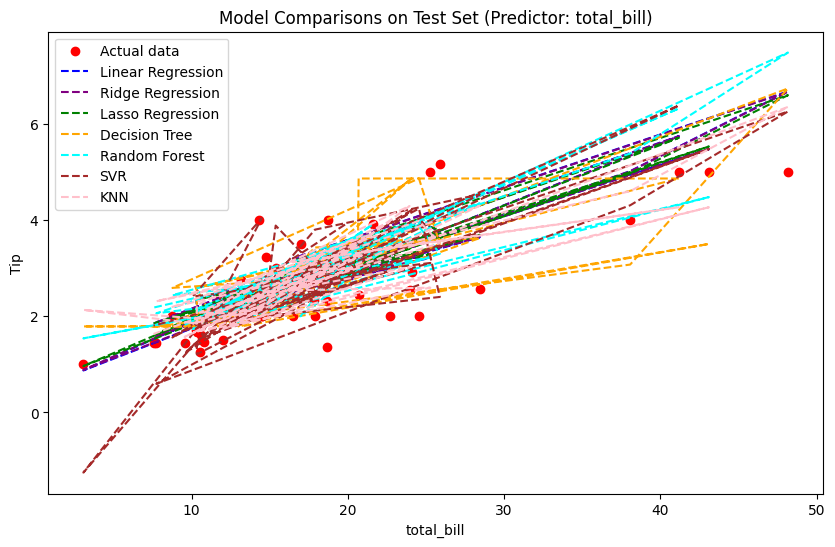

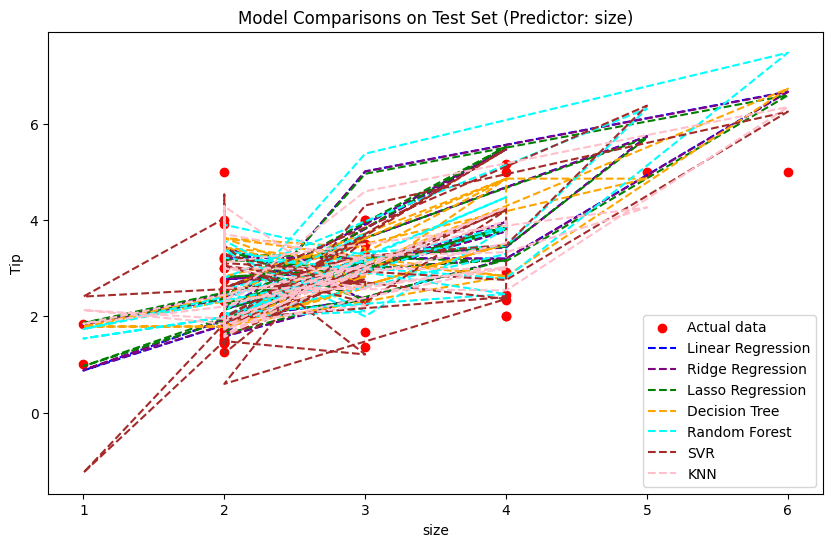

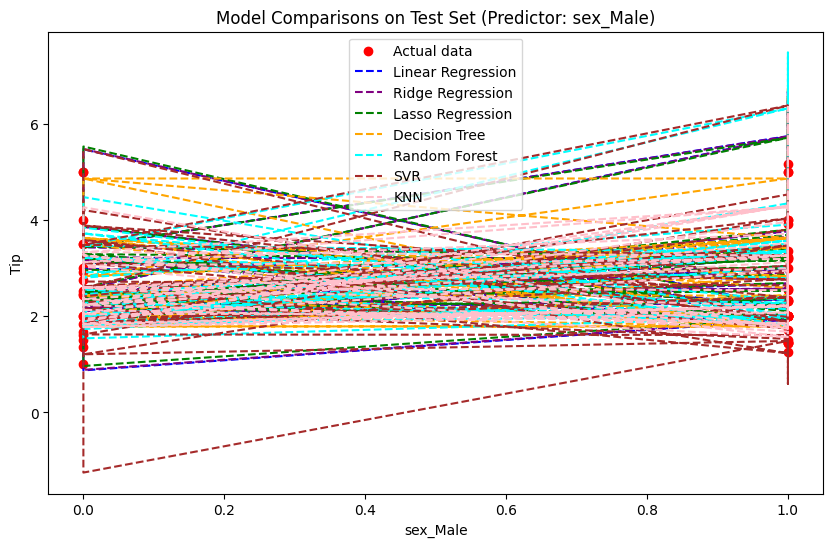

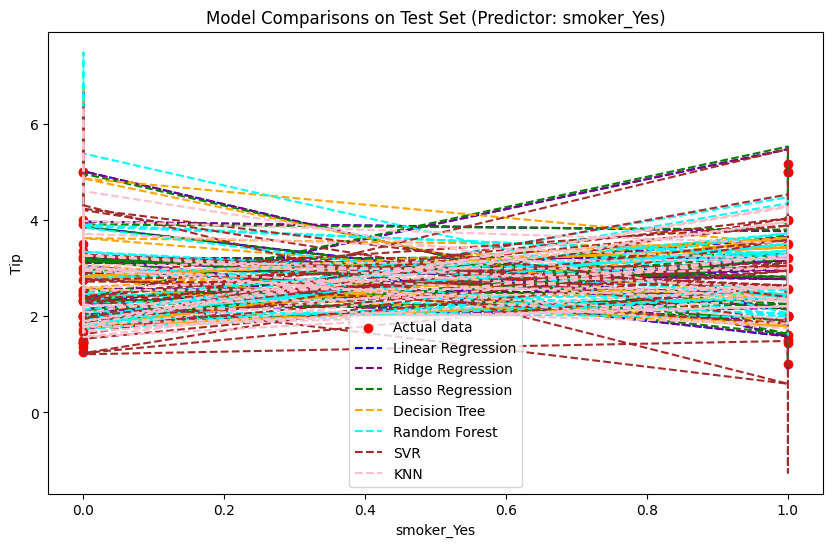

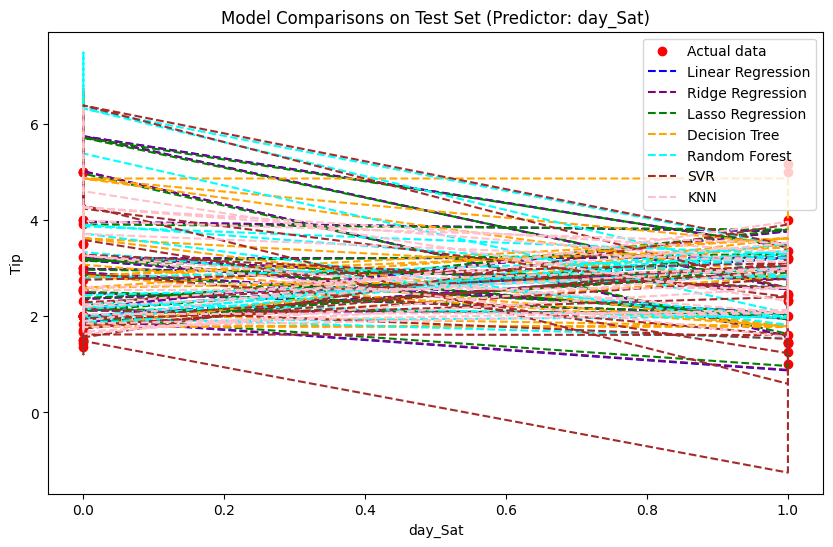

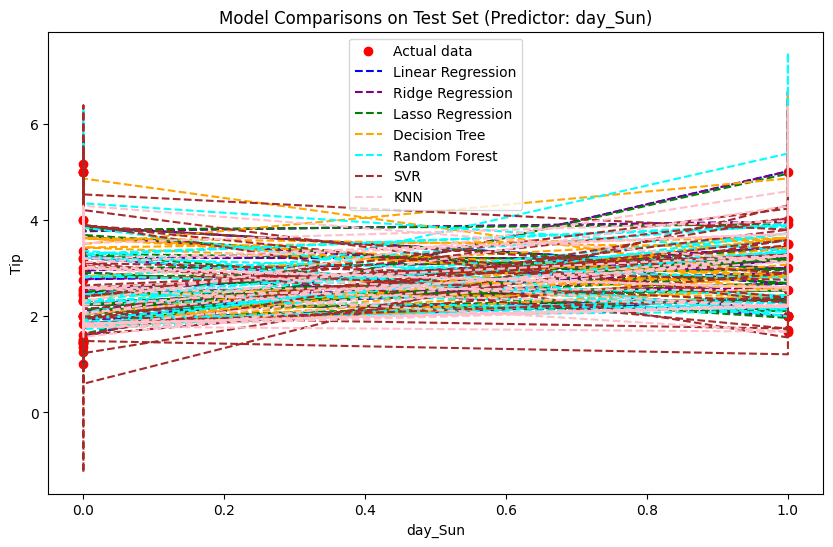

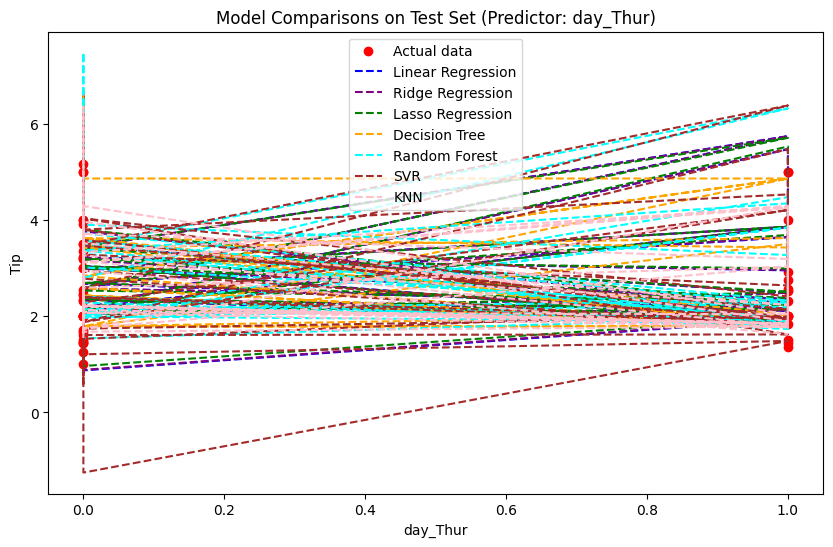

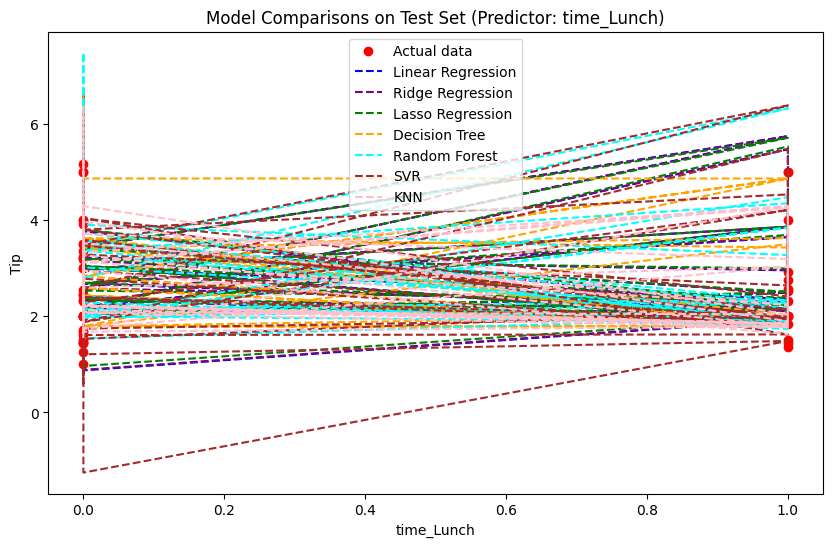

In [34]:
for i, col in enumerate(X_test1.columns):  # Adjust if X_test is a DataFrame with column names
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test1[col], y_test1, color='red', label='Actual data')

    # Plot predictions for each model with respect to the current predictor
    plt.plot(X_test1[col], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
    plt.plot(X_test1[col], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
    plt.plot(X_test1[col], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
    plt.plot(X_test1[col], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
    plt.plot(X_test1[col], y_pred_rf, color='cyan', label='Random Forest', linestyle='--')
    plt.plot(X_test1[col], y_pred_svr, color='brown', label='SVR', linestyle='--')
    plt.plot(X_test1[col], y_pred_knn, color='pink', label='KNN', linestyle='--')

    plt.title(f'Model Comparisons on Test Set (Predictor: {col})')
    plt.xlabel(col)
    plt.ylabel('Tip')
    plt.legend()
    plt.show()

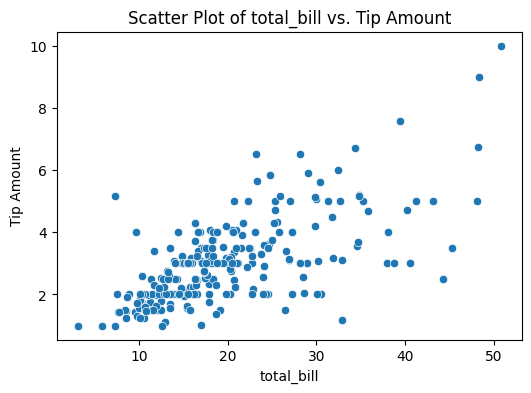

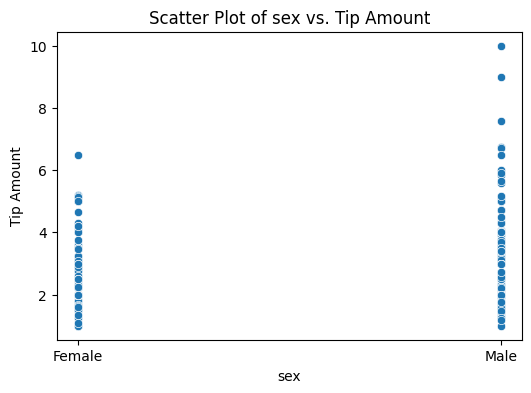

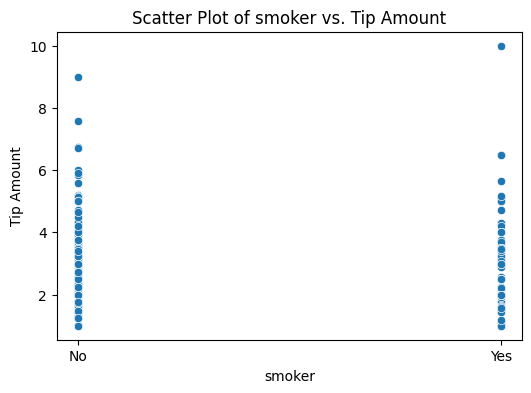

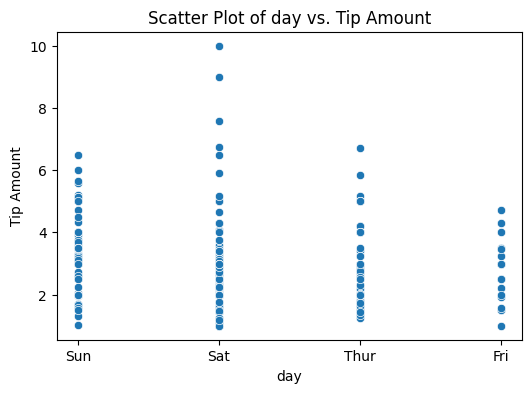

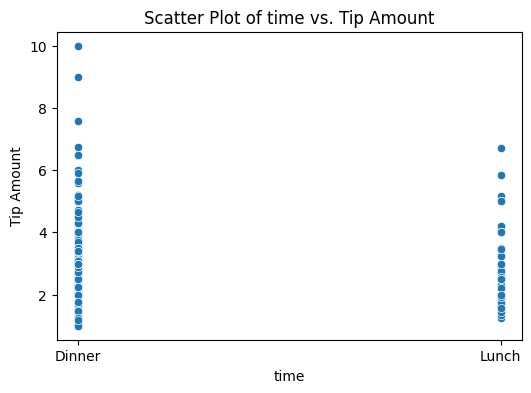

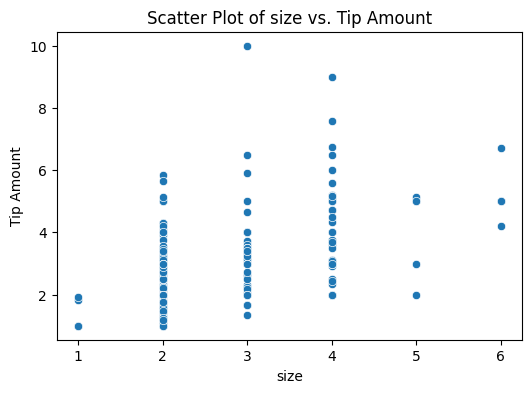

In [35]:
predictors = df.columns.drop('tip')
for predictor in predictors:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[predictor], y=df['tip'])
    plt.title(f'Scatter Plot of {predictor} vs. Tip Amount')
    plt.xlabel(predictor)
    plt.ylabel('Tip Amount')
    plt.show()

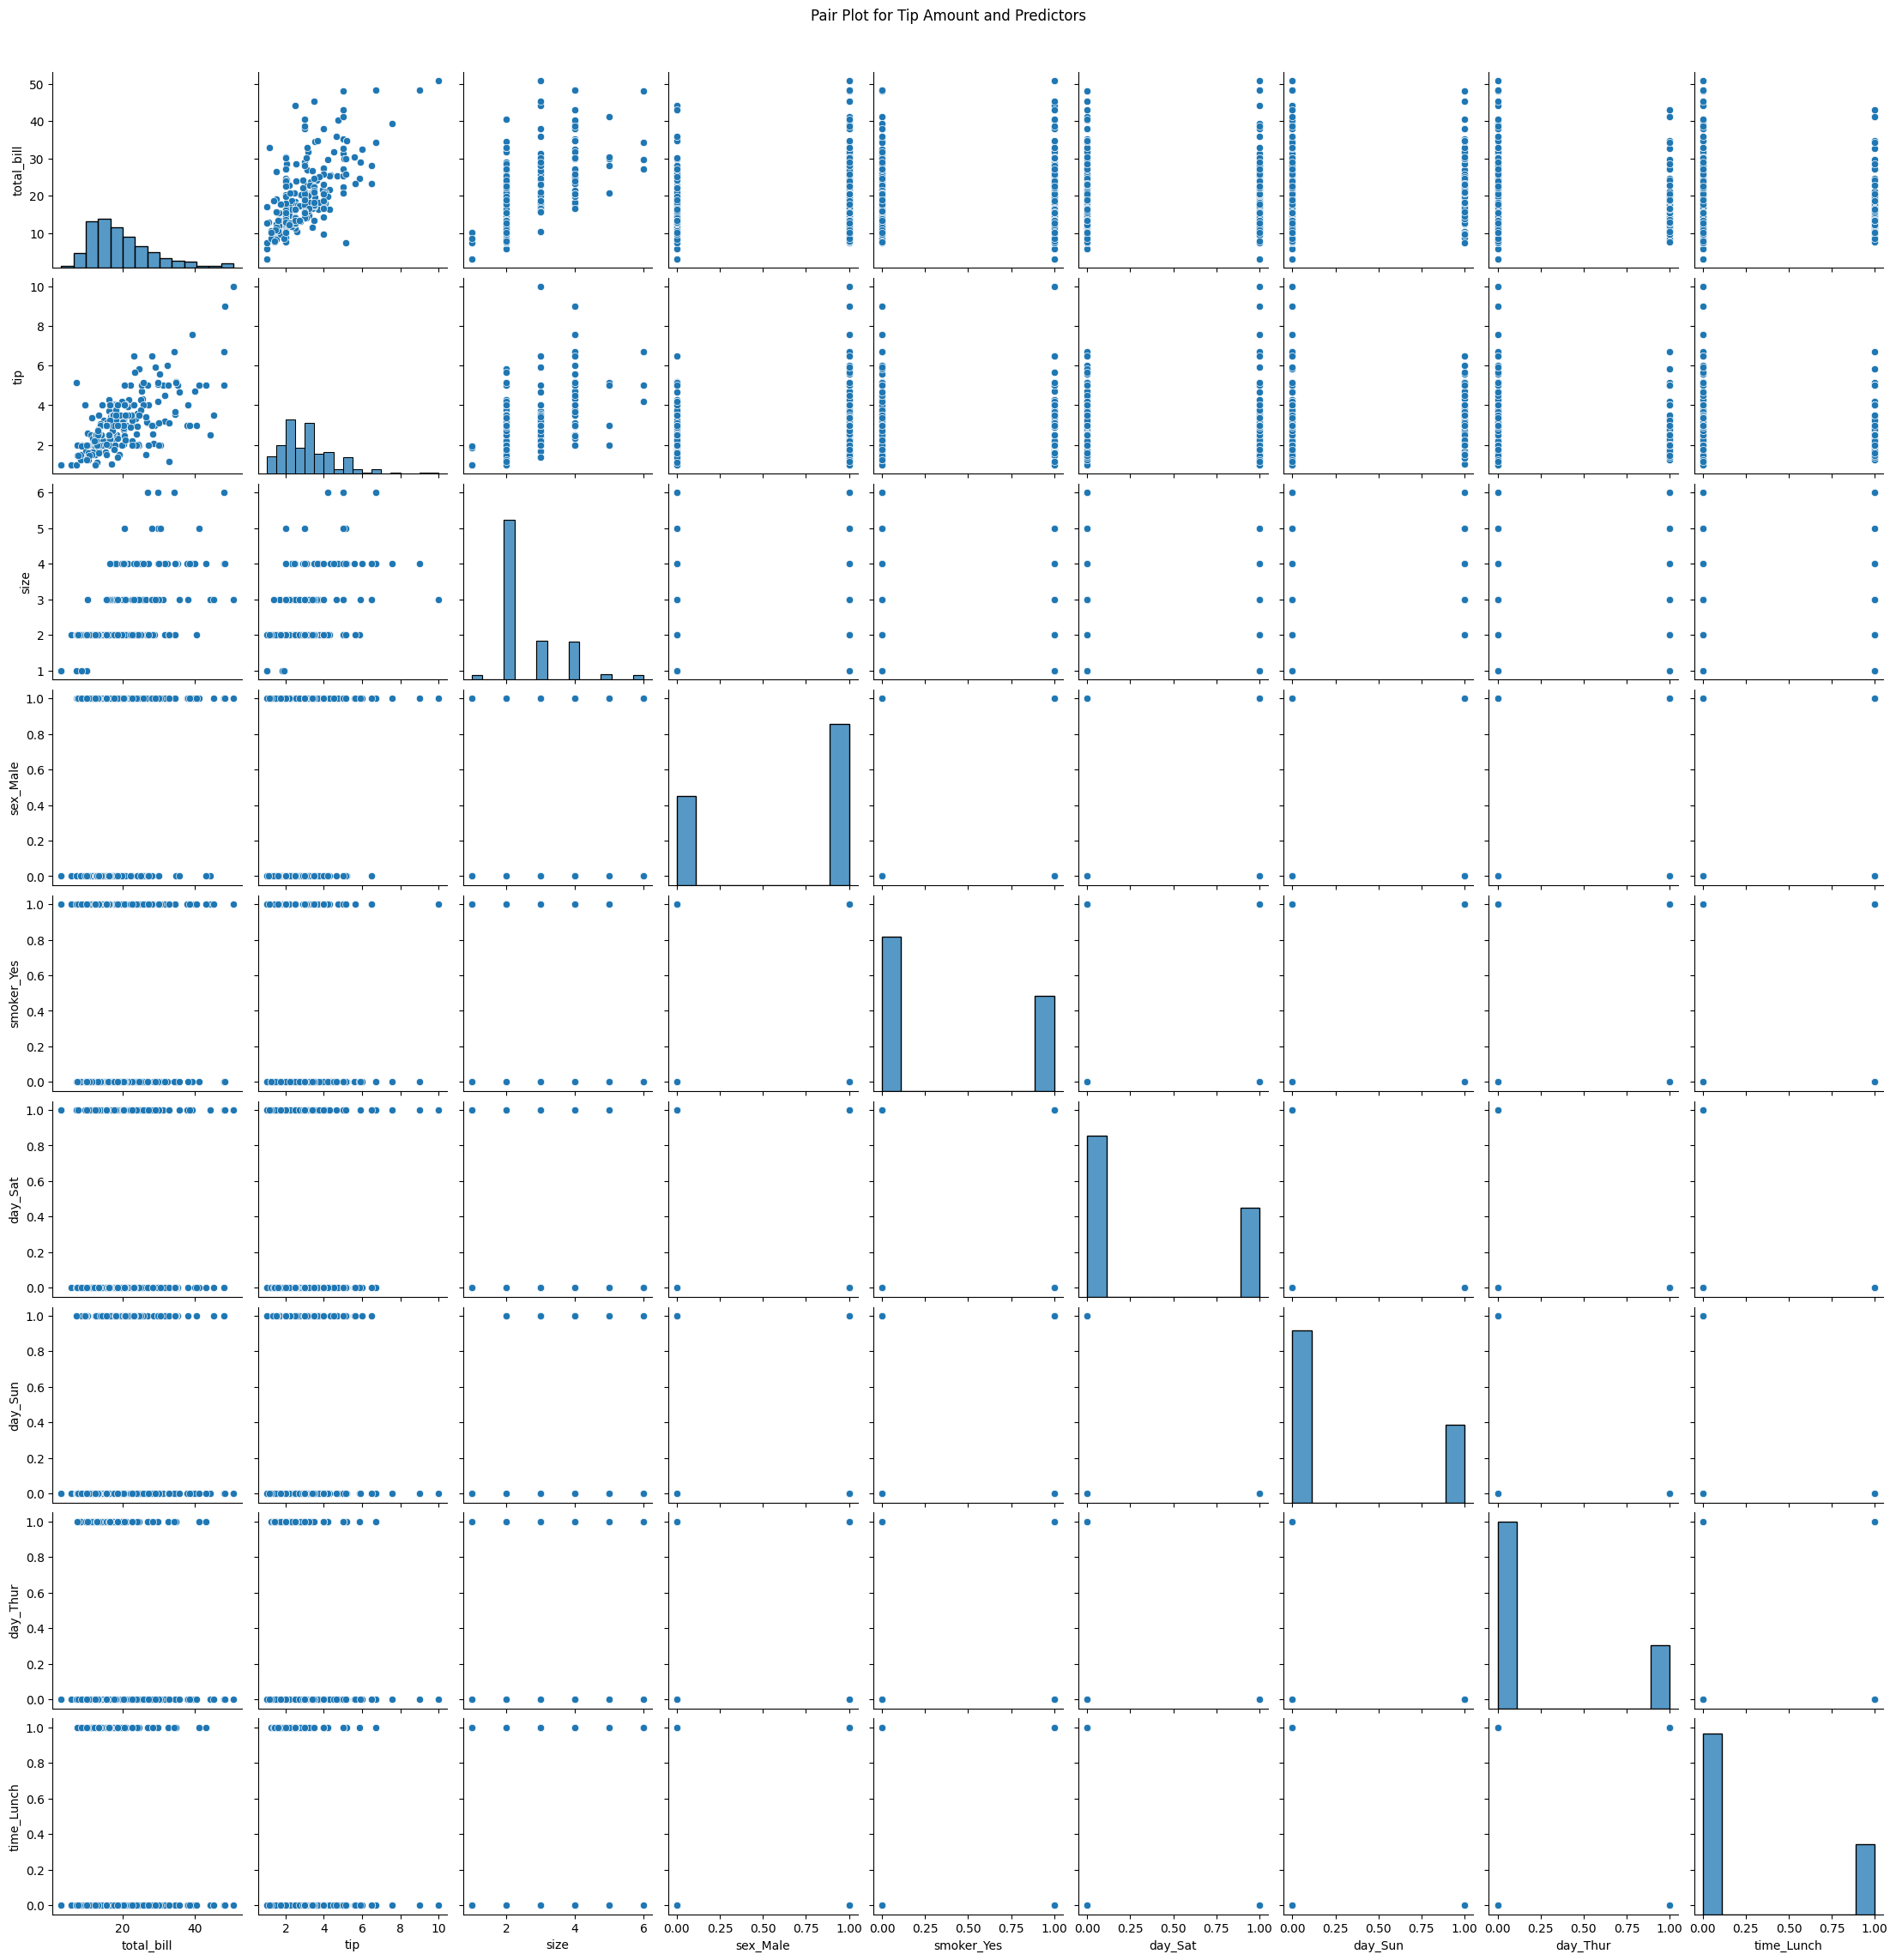

In [36]:
sns.pairplot(df_dummies)
plt.suptitle('Pair Plot for Tip Amount and Predictors', y=1.02)
plt.show()

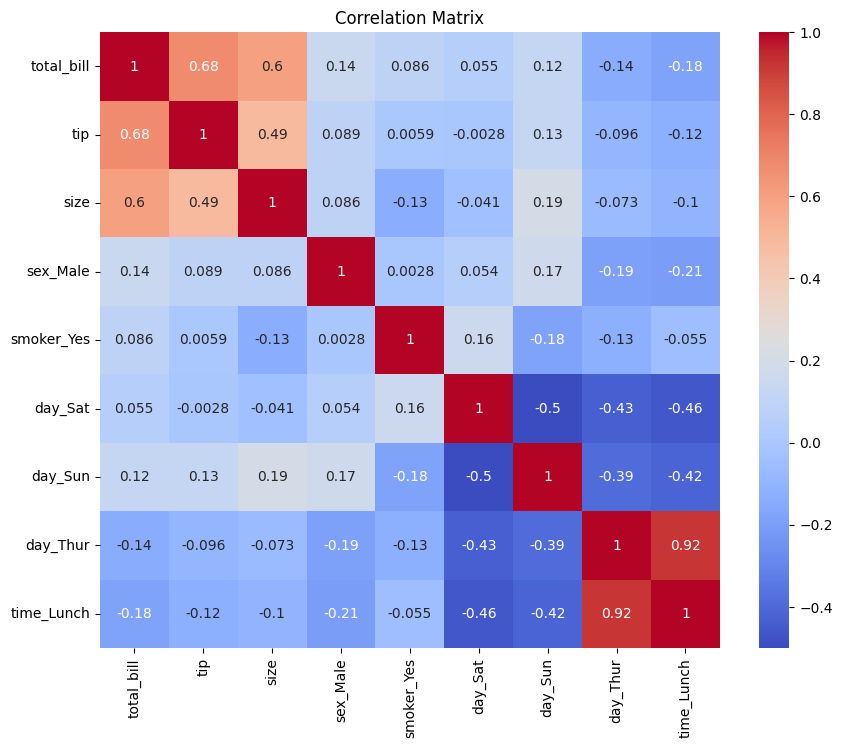

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_dummies.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [38]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Rainbow test for linearity
X2 = df_dummies.drop(columns='tip')
X2 = X2.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

y2 = df['tip']

X2 = sm.add_constant(X2)

model = sm.OLS(y2, X2).fit()

rainbow_stat, p_value = sms.linear_rainbow(model)
print(f"Rainbow Test p-value: {p_value}")
print("Significant linearity if p-value is below 0.05")

Rainbow Test p-value: 0.1658838305924099
Significant linearity if p-value is below 0.05


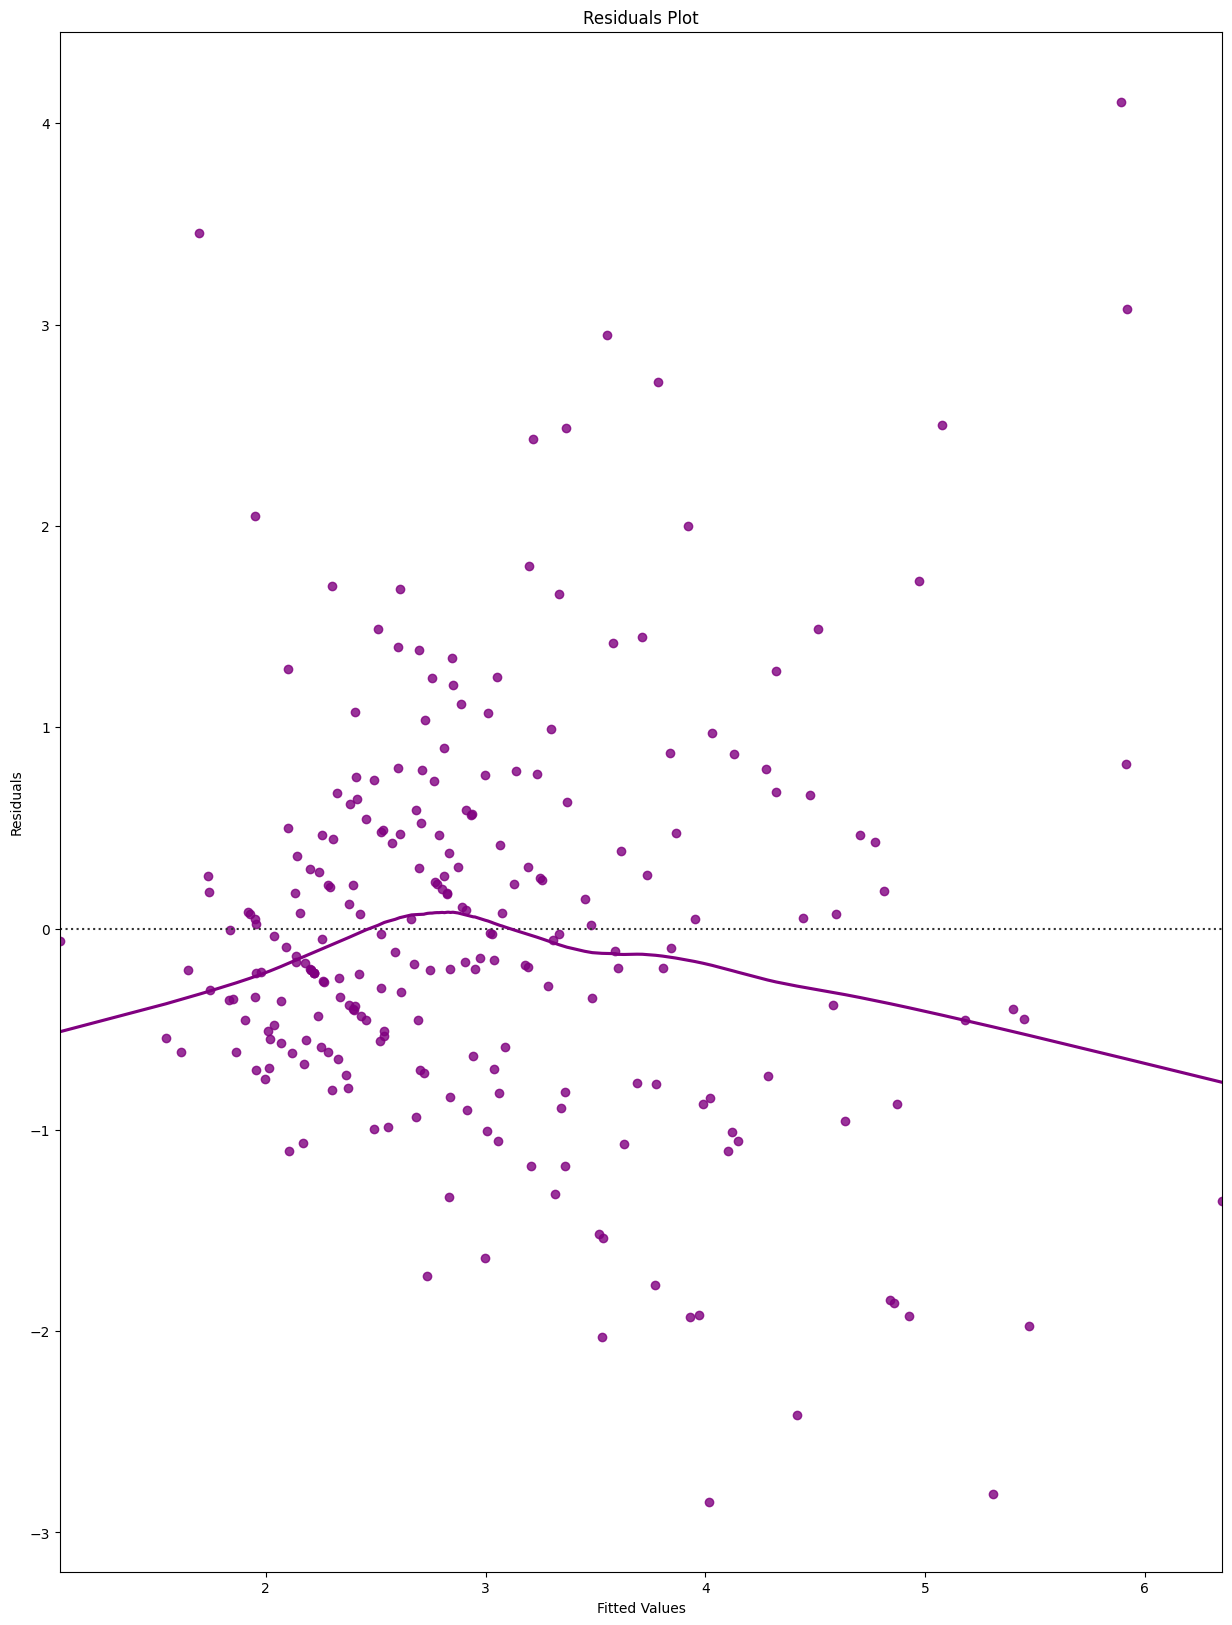

In [39]:
residuals = model.resid
sns.residplot(x=model.predict(X2), y=residuals, lowess=True, color="purple")
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

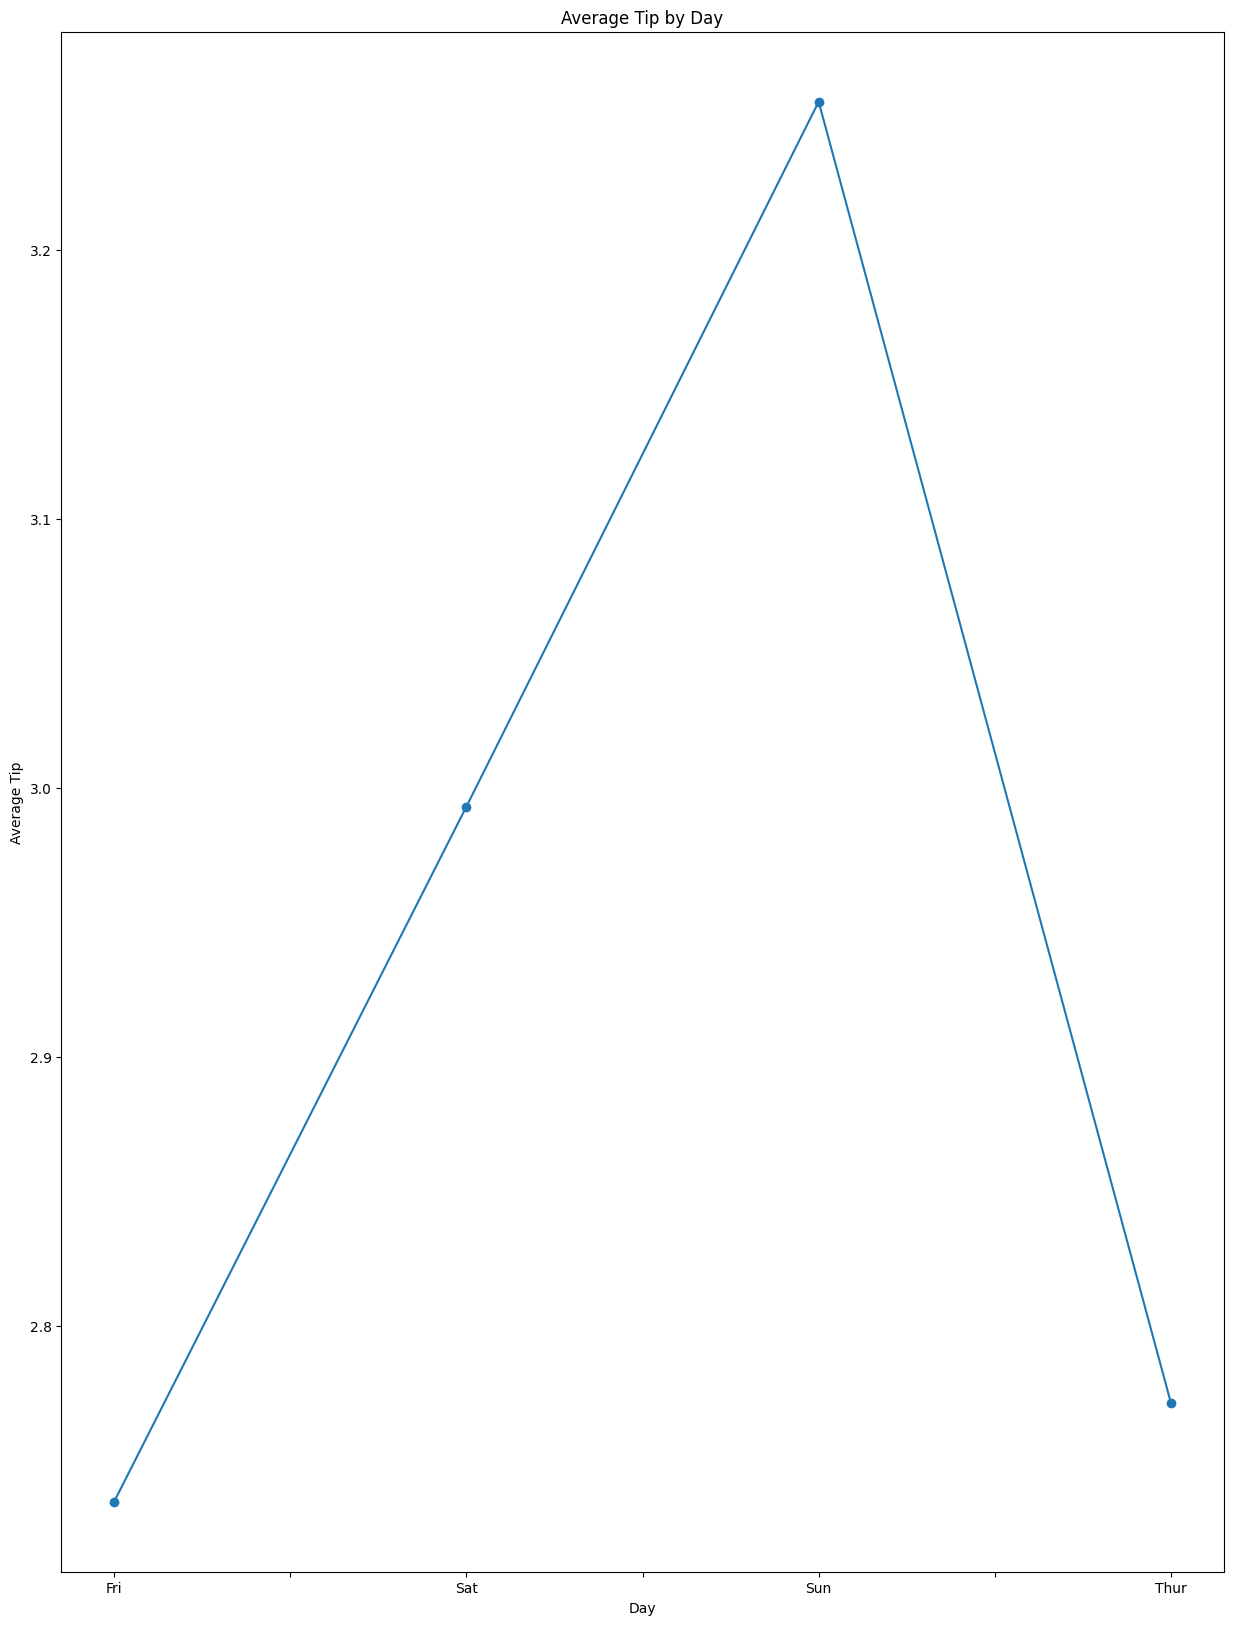

In [40]:
daily_avg_tips = df.groupby('day')['tip'].mean()

daily_avg_tips.plot(kind='line', marker='o', title='Average Tip by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()

1) Tip amount is significantly affected by total bill, along with size and day of the week as in weekdays or weekends.

2) Lasso regression performed best among all tested models, with the lowest MSE values and higher R-squared values, along with Ridge and linear Regression along the same range. These models are effective at managing multicollinearity by penalizing coefficients, thus providing consistent predictions.

Support Vector Regressor (SVR) and K-Nearest Neighbors (KNN) models had weaker performances with high MSE and low R-squared scores, showing they are not suitable for this problem.

3) Analysis by time and day can help management understand peak tipping periods. For instance, if tips are consistently higher on weekends, management could focus on optimizing staff or running promotions to capture more revenue during these periods.

There is a visible positive correlation between total_bill and tip, indicating that as the total bill increases, tips also tend to increase. This suggests that customers who spend more tend to tip more, which aligns with general tipping behavior.

There appears to be more variation in tips during dinner times than lunch, suggesting dinner might be a better time to focus on tip-increasing strategies.

Also, by understanding customer demographics (like smoker status or group size), management could tailor service to potentially increase satisfaction and tipping behavior.

Hence, in this way we can analyze different categories and optimise staffing and service based on the analysis.